## a) Carga del dataset
Se carga el dataset Iris utilizando sklearn.


In [26]:
import pandas as pd
import numpy as np

from sklearn.datasets import load_iris

data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['species'] = data.target

df.head()


sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0

## b) Análisis exploratorio inicial
Se revisan tipos de datos, valores nulos y estadísticas básicas

In [2]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [3]:
df.describe()


sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)     species  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000

In [4]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

## 2.a Limpieza de datos
El dataset no presenta valores nulos, por lo que no se requiere imputación.

## 2.b Visualización de datos
Se realizan gráficos para analizar la distribución y relaciones entre v

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt



In [12]:
import plotly.express as px

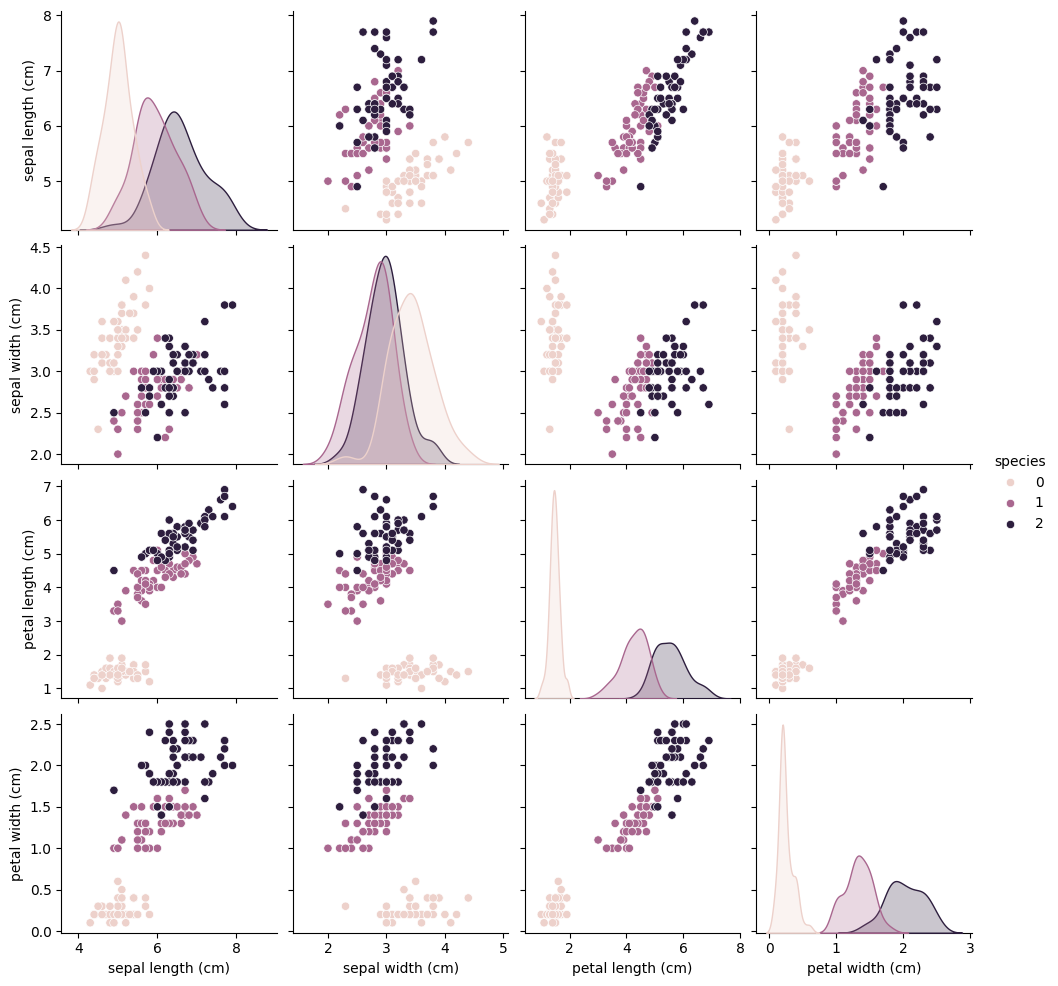

In [15]:
sns.pairplot(df, hue='species')
plt.show()


Utilice un pairplot con seaborn para observar de forma general la relación entre todas las variables del dataset.
Se puede notar que algunas variables como el largo del pétalo ayudan a diferenciar claramente las especies.

In [16]:
fig = px.histogram(df,
                   x='petal length (cm)',
                   color='species',
                   title='Distribución del largo del pétalo por especie')
fig.show()


In [17]:
fig = px.scatter(df,
                 x='sepal length (cm)',
                 y='petal length (cm)',
                 color='species',
                 title='Relación entre sépalo y pétalo')
fig.show()


3. Selección de atributos usando correlación

In [19]:
corr = df.drop('species', axis=1).corr()
corr

sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   

                   petal width (cm)  
sepal length (cm)          0.817941  
sepal width (cm)          -0.366126  
petal length (cm)          0.962865  
petal width (cm)           1.000000

## 3.b Visualización de la correlación
Se utiliza un mapa de calor para visualizar las correlaciones.

In [20]:
fig = px.imshow(corr,
                text_auto=True,
                title='Matriz de correlación')
fig.show()

Atributos

In [21]:
X = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)']]
y = df['species']


## 3.d Justificación
Se selecciono variables que no presentan una alta correlación entre sí menor a 0.8 para evitar redundancia en el modelo.


Modelado de Machine Learning

4.a Selección del modelo
## 4.a Selección del modelo
Se utiliza RandomForestClassifier por su buen desempeño en clasificación.

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [23]:
from sklearn.ensemble import RandomForestClassifier

modelo = RandomForestClassifier()
modelo.fit(X_train, y_train)


RandomForestClassifier()

In [24]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = modelo.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9666666666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



In [25]:
import pickle

with open('modelo.pkl', 'wb') as archivo_salida:
    pickle.dump(modelo, archivo_salida)


## 5. Conclusiones

El modelo de clasificación logró un buen desempeño en la predicción de las especies de flores,  
las variables seleccionadas fueron suficientes para diferenciar las clase y el  
uso de gráficos permitió visualizar la separación entre especies.

Se concluye que el modelo es adecuado para este tipo de problema.


In [29]:
import sys
!{sys.executable} -m pip install reportlab

from reportlab.platypus import SimpleDocTemplate, Paragraph, Spacer
from reportlab.lib.styles import getSampleStyleSheet

# Crear el documento
doc = SimpleDocTemplate("presentacion.pdf")
styles = getSampleStyleSheet()

# Contenido del PDF
contenido = []

contenido.append(Paragraph("Impacto de las Redes Sociales en la Ansiedad", styles['Title']))
contenido.append(Spacer(1, 10))

contenido.append(Paragraph("Introducción:", styles['Heading2']))
contenido.append(Paragraph("Este trabajo analiza la relación entre el uso de redes sociales y los niveles de ansiedad en estudiantes universitarios.", styles['BodyText']))
contenido.append(Spacer(1, 10))

contenido.append(Paragraph("Objetivo:", styles['Heading2']))
contenido.append(Paragraph("Determinar si el uso excesivo de redes sociales influye en el aumento de la ansiedad.", styles['BodyText']))
contenido.append(Spacer(1, 10))

contenido.append(Paragraph("Resultados:", styles['Heading2']))
contenido.append(Paragraph("Se observó que los estudiantes que pasan más de 4 horas diarias en redes sociales presentan mayores niveles de ansiedad.", styles['BodyText']))

# Construir PDF
doc.build(contenido)

print("PDF creado correctamente")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 66.4 MB/s eta 0:00:00
PDF creado correctamente


In [30]:
import os

os.makedirs("mi_proyecto_ml/data", exist_ok=True)
os.makedirs("mi_proyecto_ml/models", exist_ok=True)
os.makedirs("mi_proyecto_ml/reports", exist_ok=True)
os.makedirs("mi_proyecto_ml/notebooks", exist_ok=True)


In [31]:
import shutil

# mover modelo
shutil.move("modelo.pkl", "mi_proyecto_ml/models/modelo.pkl")

# mover PDF
shutil.move("presentacion.pdf", "mi_proyecto_ml/reports/presentacion.pdf")


'mi_proyecto_ml/reports/presentacion.pdf'